**IMPORT REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**LOAD THE DATASET**

In [2]:
df = pd.read_csv("financial_loan.csv")

In [3]:
df

id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT  11-02-2021   
1                       MKC Accounting     E           RENT  01-01-2021   
2                Chemat Technology Inc     C           RENT  05-01-2021   
3                  barnes distribution     B       MORTGAGE  25-02-2021   
4                        J&J Steel Inc     A       MORTGAGE  01-01-2021   
...                                ...   ...            ...         ...   
38571         Joseph M Sanzari Company     C       MORTGAGE  11-07-2021   
38572                        Swat Fame     C           RENT  11-10-2021   
38573  Anaheim Regional Medical Center     D           RENT  11-09-2021   
38574               Brooklyn Radiology     D           RENT  11-10-2021   
38575                    Allen Edmonds     F           RENT  11-07-2021   

      last_credit_pull_date last_payment_date  ... sub_grade        term  \
0                13-09-2021        13-04-2021  ...        C4   60 months   
1                14-12-2021        15-01-2021  ...        E1   36 months   
2                12-12-2021        09-01-2021  ...        C5   36 months   
3                12-12-2021        12-03-2021  ...        B2   60 months   
4                14-12-2021        15-01-2021  ...        A1   36 months   
...                     ...               ...  ...       ...         ...   
38571            16-05-2021        16-05-2021  ...        C1   60 months   
38572            16-04-2021        16-05-2021  ...        C1   60 months   
38573            16-05-2021        16-05-2021  ...        D5   60 months   
38574            16-05-2021        16-05-2021  ...        D5   60 months   
38575            16-05-2021        16-05-2021  ...        F3   60 months   

       verification_status annual_income     dti installment int_rate  \
0          Source Verified       30000.0  0.0100       59.83   0.1527   
1          Source Verified       48000.0  0.0535      109.43   0.1864   
2             Not Verified       50000.0  0.2088      421.65   0.1596   
3          Source Verified       42000.0  0.0540       97.06   0.1065   
4                 Verified       83000.0  0.0231      106.53   0.0603   
...                    ...           ...     ...         ...      ...   
38571             Verified      100000.0  0.1986      551.64   0.1299   
38572             Verified       50000.0  0.0458      579.72   0.1349   
38573             Verified       65000.0  0.1734      627.93   0.1749   
38574             Verified      368000.0  0.0009      612.72   0.1825   
38575             Verified       80000.0  0.0600      486.86   0.2099   

       loan_amount  total_acc  total_payment  
0             2500          4           1009  
1             3000          4           3939  
2            12000         11           3522  
3             4500          9           4911  
4             3500         28           3835  
...            ...        ...            ...  
38571        24250         33          31946  
38572        25200         18          31870  
38573        25000         20          35721  
38574        24000          9          33677  
38575        18000          7          27679  

[38576 rows x 24 columns]

**DATA EXPLORATION**

In [4]:
df.shape

(38576, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [7]:
# datatypes of columns
int64 = ['id', 'member_id', 'loan_amount', 'total_acc', 'total_payment']

**DATA PREPROCESSING**

**1. DATA CLEANING**

**column_1 ['id']**

In [8]:
df['id']

0        1077430
1        1072053
2        1069243
3        1041756
4        1068350
          ...   
38571     803452
38572     970377
38573     875376
38574     972997
38575     682952
Name: id, Length: 38576, dtype: int64

In [9]:
df['id'].duplicated().sum()

0

**column_2 ['member_id']**

In [10]:
df['member_id']

0        1314167
1        1288686
2        1304116
3        1272024
4        1302971
          ...   
38571     992381
38572    1192039
38573    1089898
38574    1194971
38575     872217
Name: member_id, Length: 38576, dtype: int64

In [11]:
df['member_id'].duplicated().sum()

0

**column_3 ['loan_amount']**

In [12]:
df['loan_amount']

0         2500
1         3000
2        12000
3         4500
4         3500
         ...  
38571    24250
38572    25200
38573    25000
38574    24000
38575    18000
Name: loan_amount, Length: 38576, dtype: int64

**column_4 ['total_acc']**

In [13]:
df['total_acc']

0         4
1         4
2        11
3         9
4        28
         ..
38571    33
38572    18
38573    20
38574     9
38575     7
Name: total_acc, Length: 38576, dtype: int64

In [14]:
df['total_acc'].unique()

array([ 4, 11,  9, 28, 30, 23, 31, 21, 33, 13,  3, 15, 18, 14,  8,  7, 20,
       39, 24, 10, 19, 27,  6, 16, 45, 25,  5, 43, 29, 22, 41, 35, 44, 36,
       17, 26, 37, 32, 47, 52, 42, 46, 12, 50, 34, 59, 38, 63, 49, 48, 61,
       51, 55, 40, 53, 62, 58, 67, 54, 57, 56, 70,  2, 64, 60, 80, 79, 71,
       66, 65, 69, 90, 68, 74, 75, 87, 78, 72, 77, 81, 76, 73])

In [15]:
df['total_acc'].nunique()

82

**column_5 ['total_payment']**

In [16]:
df['total_payment']

0         1009
1         3939
2         3522
3         4911
4         3835
         ...  
38571    31946
38572    31870
38573    35721
38574    33677
38575    27679
Name: total_payment, Length: 38576, dtype: int64

In [17]:
object = ['address_state', 'application_type', 'emp_length', 'emp_title',
          'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date','purpose', 
          'sub_grade', 'term', 'verification_status']

**column_6 ['address_state']**

In [18]:
df['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [19]:
df['address_state'].nunique()

50

In [20]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

**column_7 ['emp_length']**

In [21]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [22]:
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length'] = df['emp_length'].map(emp_length_mapping)

**column_8 ['emp_title']**

In [23]:
df['emp_title'].value_counts().sum()

37138

In [24]:
missing_emp_title = df['emp_title'].isnull().sum()
missing_emp_title

1438

In [25]:
df['emp_title'].nunique()

28525

**column_9 ['grade']**

In [26]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

**column_10 ['issue_date']**

In [27]:
df['issue_date']

0        11-02-2021
1        01-01-2021
2        05-01-2021
3        25-02-2021
4        01-01-2021
            ...    
38571    11-07-2021
38572    11-10-2021
38573    11-09-2021
38574    11-10-2021
38575    11-07-2021
Name: issue_date, Length: 38576, dtype: object

In [28]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y', errors='coerce')

In [29]:
df['issue_date']

0       2021-02-11
1       2021-01-01
2       2021-01-05
3       2021-02-25
4       2021-01-01
           ...    
38571   2021-07-11
38572   2021-10-11
38573   2021-09-11
38574   2021-10-11
38575   2021-07-11
Name: issue_date, Length: 38576, dtype: datetime64[ns]

**column_11 ['last_credit_pull_date']**

In [30]:
df['last_credit_pull_date']

0        13-09-2021
1        14-12-2021
2        12-12-2021
3        12-12-2021
4        14-12-2021
            ...    
38571    16-05-2021
38572    16-04-2021
38573    16-05-2021
38574    16-05-2021
38575    16-05-2021
Name: last_credit_pull_date, Length: 38576, dtype: object

In [31]:
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], format='%d-%m-%Y', errors='coerce')

In [32]:
df['last_credit_pull_date']

0       2021-09-13
1       2021-12-14
2       2021-12-12
3       2021-12-12
4       2021-12-14
           ...    
38571   2021-05-16
38572   2021-04-16
38573   2021-05-16
38574   2021-05-16
38575   2021-05-16
Name: last_credit_pull_date, Length: 38576, dtype: datetime64[ns]

**column_12 ['last_payment_date']**

In [33]:
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d-%m-%Y', errors='coerce')
df['last_payment_date']

0       2021-04-13
1       2021-01-15
2       2021-01-09
3       2021-03-12
4       2021-01-15
           ...    
38571   2021-05-16
38572   2021-05-16
38573   2021-05-16
38574   2021-05-16
38575   2021-05-16
Name: last_payment_date, Length: 38576, dtype: datetime64[ns]

**column_13 ['loan_status']**

In [34]:
df['loan_status'].nunique()

3

In [35]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

**column_14 ['next_payment_date']**

In [36]:
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'], format='%d-%m-%Y', errors='coerce')
df['next_payment_date']

0       2021-05-13
1       2021-02-15
2       2021-02-09
3       2021-04-12
4       2021-02-15
           ...    
38571   2021-06-16
38572   2021-06-16
38573   2021-06-16
38574   2021-06-16
38575   2021-06-16
Name: next_payment_date, Length: 38576, dtype: datetime64[ns]

**column_15 ['purpose']**

In [37]:
df['purpose']

0            car
1            car
2            car
3            car
4            car
          ...   
38571    wedding
38572    wedding
38573    wedding
38574    wedding
38575    wedding
Name: purpose, Length: 38576, dtype: object

In [38]:
df['purpose'].nunique()

14

In [39]:
df['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

**column_16 ['sub_grade']**

In [40]:
df['sub_grade']

0        C4
1        E1
2        C5
3        B2
4        A1
         ..
38571    C1
38572    C1
38573    D5
38574    D5
38575    F3
Name: sub_grade, Length: 38576, dtype: object

In [41]:
df['sub_grade'].nunique()

35

**column_17 ['term']**

In [42]:
df['term']

0         60 months
1         36 months
2         36 months
3         60 months
4         36 months
            ...    
38571     60 months
38572     60 months
38573     60 months
38574     60 months
38575     60 months
Name: term, Length: 38576, dtype: object

In [43]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [44]:
df.rename(columns={'term': 'term(in months)'}, inplace=True)

In [45]:
df['term(in months)']

0         60 months
1         36 months
2         36 months
3         60 months
4         36 months
            ...    
38571     60 months
38572     60 months
38573     60 months
38574     60 months
38575     60 months
Name: term(in months), Length: 38576, dtype: object

In [46]:
df['term(in months)'] = df['term(in months)'].str.strip()
df['term(in months)'] = df['term(in months)'].replace({'60 months': 60, '36 months': 36}).astype(int)

In [47]:
df['term(in months)']

0        60
1        36
2        36
3        60
4        36
         ..
38571    60
38572    60
38573    60
38574    60
38575    60
Name: term(in months), Length: 38576, dtype: int64

**column_18 ['verification_status']**

In [48]:
df['verification_status']

0        Source Verified
1        Source Verified
2           Not Verified
3        Source Verified
4               Verified
              ...       
38571           Verified
38572           Verified
38573           Verified
38574           Verified
38575           Verified
Name: verification_status, Length: 38576, dtype: object

In [49]:
df['verification_status'].nunique()

3

In [50]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

**column_19 ['home_ownership']**

In [51]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [52]:
float64 = ['annual_income','dti', 'installment', 'int_rate']

**column_20 ['annual_income']**

In [53]:
df['annual_income']

0         30000.0
1         48000.0
2         50000.0
3         42000.0
4         83000.0
           ...   
38571    100000.0
38572     50000.0
38573     65000.0
38574    368000.0
38575     80000.0
Name: annual_income, Length: 38576, dtype: float64

**column_21 ['dti']**

In [54]:
df['dti']

0        0.0100
1        0.0535
2        0.2088
3        0.0540
4        0.0231
          ...  
38571    0.1986
38572    0.0458
38573    0.1734
38574    0.0009
38575    0.0600
Name: dti, Length: 38576, dtype: float64

**column_22 ['installment']**

In [55]:
df['installment']

0         59.83
1        109.43
2        421.65
3         97.06
4        106.53
          ...  
38571    551.64
38572    579.72
38573    627.93
38574    612.72
38575    486.86
Name: installment, Length: 38576, dtype: float64

**column_23 ['int_rate']**

In [56]:
df['int_rate']

0        0.1527
1        0.1864
2        0.1596
3        0.1065
4        0.0603
          ...  
38571    0.1299
38572    0.1349
38573    0.1749
38574    0.1825
38575    0.2099
Name: int_rate, Length: 38576, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  float64       
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

**KPI CALCULATION**

**I. Total Applications**

In [58]:
total_applications = df.shape[0]
total_applications

38576

In [59]:
start_date = df['issue_date'].min()
end_date = df['issue_date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
unique_months = date_range.to_period('M').unique()
unique_months_list = unique_months.to_timestamp().strftime('%m').tolist()
print(unique_months_list)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


**1. Applications in January**

In [60]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 1]
total_applications_1 = filtered_df.shape[0]
print(f"Total number of applications in January: {total_applications_1}")

Total number of applications in January: 2332


In [61]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 1]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in January for term 36 months: {total_applications_36}")
print(f"Total number of applications in January for term 60 months: {total_applications_60}")

Total number of applications in January for term 36 months: 1911
Total number of applications in January for term 60 months: 421


**2. Applications in February**

In [62]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 2]
total_applications_2 = filtered_df.shape[0]
print(f"Total number of applications in February: {total_applications_2}")

Total number of applications in February: 2279


In [63]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 2]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in February for term 36 months: {total_applications_36}")
print(f"Total number of applications in February for term 60 months: {total_applications_60}")

Total number of applications in February for term 36 months: 1832
Total number of applications in February for term 60 months: 447


**3. Applications in March**

In [64]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 3]
total_applications_3 = filtered_df.shape[0]
print(f"Total number of applications in March: {total_applications_3}")

Total number of applications in March: 2627


In [65]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 3]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in March for term 36 months: {total_applications_36}")
print(f"Total number of applications in March for term 60 months: {total_applications_60}")

Total number of applications in March for term 36 months: 2038
Total number of applications in March for term 60 months: 589


**4. Application in April**

In [66]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 4]
total_applications_4 = filtered_df.shape[0]
print(f"Total number of applications in April: {total_applications_4}")

Total number of applications in April: 2755


In [67]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 4]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in April for term 36 months: {total_applications_36}")
print(f"Total number of applications in April for term 60 months: {total_applications_60}")

Total number of applications in April for term 36 months: 2155
Total number of applications in April for term 60 months: 600


**5. Application in May**

In [68]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 5]
total_applications_5 = filtered_df.shape[0]
print(f"Total number of applications in May: {total_applications_5}")

Total number of applications in May: 2911


In [69]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 5]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in May for term 36 months: {total_applications_36}")
print(f"Total number of applications in May for term 60 months: {total_applications_60}")

Total number of applications in May for term 36 months: 2041
Total number of applications in May for term 60 months: 870


**6. Application in June**

In [70]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 6]
total_applications_6 = filtered_df.shape[0]
print(f"Total number of applications in June: {total_applications_6}")

Total number of applications in June: 3184


In [71]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 6]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in June for term 36 months: {total_applications_36}")
print(f"Total number of applications in June for term 60 months: {total_applications_60}")

Total number of applications in June for term 36 months: 2208
Total number of applications in June for term 60 months: 976


**7. Application in July**

In [72]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 7]
total_applications_7 = filtered_df.shape[0]
print(f"Total number of applications in July: {total_applications_7}")

Total number of applications in July: 3366


In [73]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 7]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in July for term 36 months: {total_applications_36}")
print(f"Total number of applications in July for term 60 months: {total_applications_60}")

Total number of applications in July for term 36 months: 2434
Total number of applications in July for term 60 months: 932


**8. Application in August**

In [74]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 8]
total_applications_8 = filtered_df.shape[0]
print(f"Total number of applications in August: {total_applications_8}")

Total number of applications in August: 3441


In [75]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 8]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in August for term 36 months: {total_applications_36}")
print(f"Total number of applications in August for term 60 months: {total_applications_60}")

Total number of applications in August for term 36 months: 2420
Total number of applications in August for term 60 months: 1021


**9. Application in September**

In [76]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 9]
total_applications_9 = filtered_df.shape[0]
print(f"Total number of applications in September: {total_applications_9}")

Total number of applications in September: 3536


In [77]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 9]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in September for term 36 months: {total_applications_36}")
print(f"Total number of applications in Spetember for term 60 months: {total_applications_60}")

Total number of applications in September for term 36 months: 2453
Total number of applications in Spetember for term 60 months: 1083


**10. Application in October**

In [78]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 10]
total_applications_10 = filtered_df.shape[0]
print(f"Total number of applications in Oct: {total_applications_10}")

Total number of applications in Oct: 3796


In [79]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 10]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in October for term 36 months: {total_applications_36}")
print(f"Total number of applications in October for term 60 months: {total_applications_60}")

Total number of applications in October for term 36 months: 2674
Total number of applications in October for term 60 months: 1122


**11. Application in November**

In [80]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 11]
total_applications_11 = filtered_df.shape[0]
print(f"Total number of applications in November: {total_applications_11}")

Total number of applications in November: 4035


In [81]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 11]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in November for term 36 months: {total_applications_36}")
print(f"Total number of applications in November for term 60 months: {total_applications_60}")

Total number of applications in November for term 36 months: 2973
Total number of applications in November for term 60 months: 1062


**12. Application in December**

In [82]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 12]
total_applications_12 = filtered_df.shape[0]
print(f"Total number of applications in December: {total_applications_12}")

Total number of applications in December: 4314


In [83]:
df['issue_month'] = df['issue_date'].dt.month
filtered_df = df[df['issue_month'] == 12]
total_applications_36 = filtered_df[filtered_df['term(in months)'] == 36].shape[0]
total_applications_60 = filtered_df[filtered_df['term(in months)'] == 60].shape[0]
print(f"Total number of applications in December for term 36 months: {total_applications_36}")
print(f"Total number of applications in December for term 60 months: {total_applications_60}")

Total number of applications in December for term 36 months: 3098
Total number of applications in December for term 60 months: 1216


**II. TOTAL_FUNDED_AMOUNT**

In [84]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount

435757075

In [85]:
total_funded_amount_36 = df[df['term(in months)'] == 36]['loan_amount'].sum()
print("Total funded amount for term 36 months:", total_funded_amount_36)

Total funded amount for term 36 months: 273041225


In [86]:
total_funded_amount_60 = df[df['term(in months)'] == 60]['loan_amount'].sum()
print("Total funded amount for term 60 months:", total_funded_amount_60)

Total funded amount for term 60 months: 162715850


**III. TOTAL_AMOUNT_RECEIVED**

In [87]:
total_amount_received = df['total_payment'].sum()
total_amount_received

473070933

In [88]:
total_amount_received_36 = df[df['term(in months)'] == 36]['total_payment'].sum()
print("Total amount received for term 36 months:", total_amount_received_36)

Total amount received for term 36 months: 294709458


In [89]:
total_amount_received_60 = df[df['term(in months)'] == 60]['total_payment'].sum()
print("Total amount received for term 60 months:", total_amount_received_60)

Total amount received for term 60 months: 178361475


**IV. AVG_INTEREST_RATE**

In [90]:
avg_interest_rate = df['int_rate'].mean()
avg_interest_rate

0.12048831397760265

In [91]:
avg_interest_rate_36 = df[df['term(in months)'] == 36]['int_rate'].mean()
print("Average interest rate for term 36 months:", round(avg_interest_rate_36, 2))

Average interest rate for term 36 months: 0.11


In [92]:
avg_interest_rate_60 = df[df['term(in months)'] == 60]['int_rate'].mean()
print("Average interest rate for term 60 months:", round(avg_interest_rate_60, 2))

Average interest rate for term 60 months: 0.15


**V. AVG_DTI**

In [93]:
avg_dti = df['dti'].mean()
avg_dti

0.13327433119037743

In [94]:
avg_dti_36 = df[df['term(in months)'] == 36]['dti'].mean()
print("Average Dept to income for term 36 months:", round(avg_dti_36, 2))

Average Dept to income for term 36 months: 0.13


In [95]:
avg_dti_60 = df[df['term(in months)'] == 60]['dti'].mean()
print("Average Dept to income for term 60 months:", round(avg_dti_60, 2))

Average Dept to income for term 60 months: 0.14


**DATA TRANSFORMATION**

In [96]:
df['loan_category'] = df['loan_status'].apply(lambda x: 'Good' if x in ['Current', 'Fully Paid'] else 'Bad')
df['loan_category']

0         Bad
1        Good
2         Bad
3        Good
4        Good
         ... 
38571    Good
38572    Good
38573    Good
38574    Good
38575    Good
Name: loan_category, Length: 38576, dtype: object

**DATA EXPLORATION**

In [97]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term(in months)', 'verification_status',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'issue_month', 'loan_category'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  float64       
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [ ]:
df_cleaned.to_csv("cleaned_file.csv", index=False)

**DATA_ANALYSIS**

**1. TOTAL NUMBER OF APPLICATION BY MONTH TO MONTH(WITH RESPECT TO TERM)**

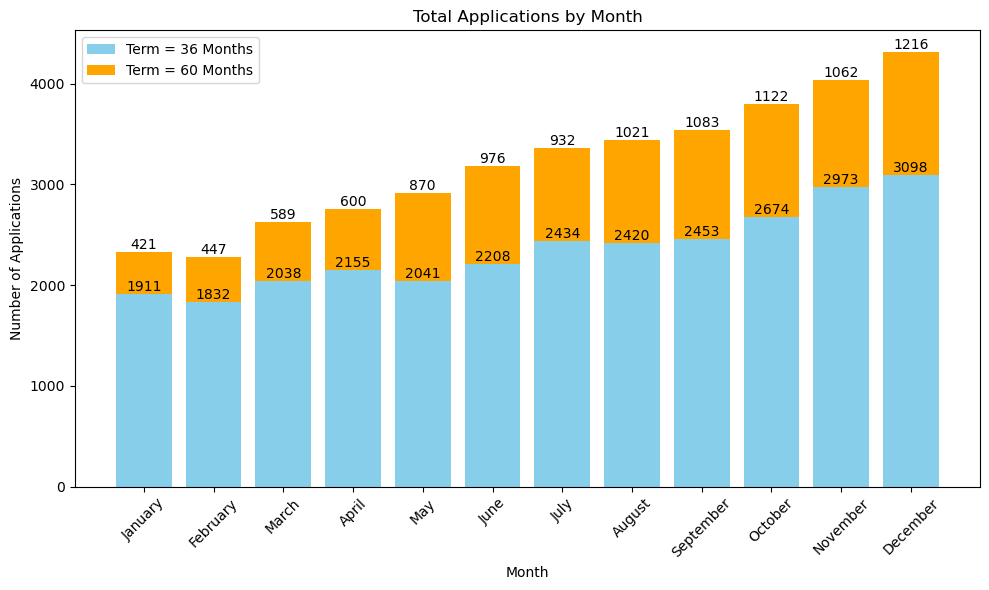

In [99]:
data = {
    'MONTH': [
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    'TOTAL APPLICATIONS': [
        2332, 2279, 2627, 2755, 2911, 3184, 3366, 3441, 3536, 3796, 4035, 4314
    ],
    'APPLICATION(TERM(IN MONTHS)=36)': [
        1911, 1832, 2038, 2155, 2041, 2208, 2434, 2420, 2453, 2674, 2973, 3098
    ],
    'APPLICATION(TERM(IN MONTHS)=60)': [
        421, 447, 589, 600, 870, 976, 932, 1021, 1083, 1122, 1062, 1216
    ]
}
df_ = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 6))
bars_36 = ax.bar(df_['MONTH'], df_['APPLICATION(TERM(IN MONTHS)=36)'], label='Term = 36 Months', color='skyblue')
bars_60 = ax.bar(df_['MONTH'], df_['APPLICATION(TERM(IN MONTHS)=60)'], 
                 bottom=df_['APPLICATION(TERM(IN MONTHS)=36)'], 
                 label='Term = 60 Months', color='orange')

for bar in bars_36:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', 
            ha='center', va='bottom')

for bar in bars_60:
    height = bar.get_height()
    bottom = bar.get_y() 
    total_height = height + bottom
    ax.text(bar.get_x() + bar.get_width() / 2, total_height, f'{height:.0f}', 
            ha='center', va='bottom')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Applications')
ax.set_title('Total Applications by Month')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_applications_by_term(in months).png')
plt.show()

**2. TOTAL NUMBER OF APPLICATION BY MONTH TO MONTH**

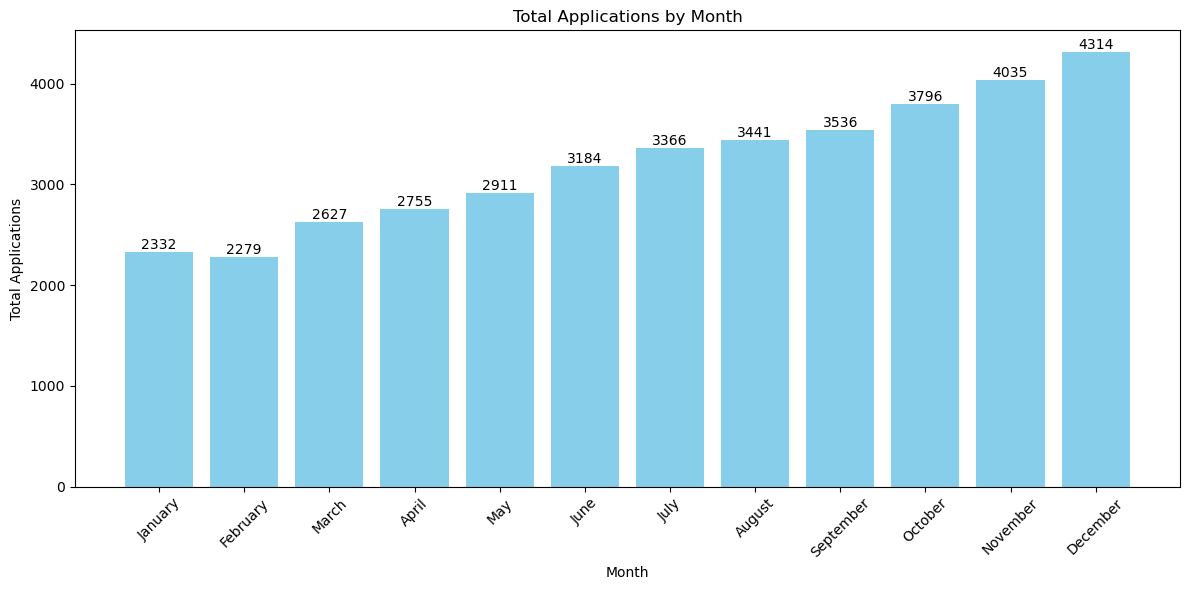

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(data['MONTH'], data['TOTAL APPLICATIONS'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom')

ax.set_xlabel('Month')
ax.set_ylabel('Total Applications')
ax.set_title('Total Applications by Month')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('total_applications_by_month.png')
plt.show()

**3. Monthly Trends in Total Loan Amounts Issued** 

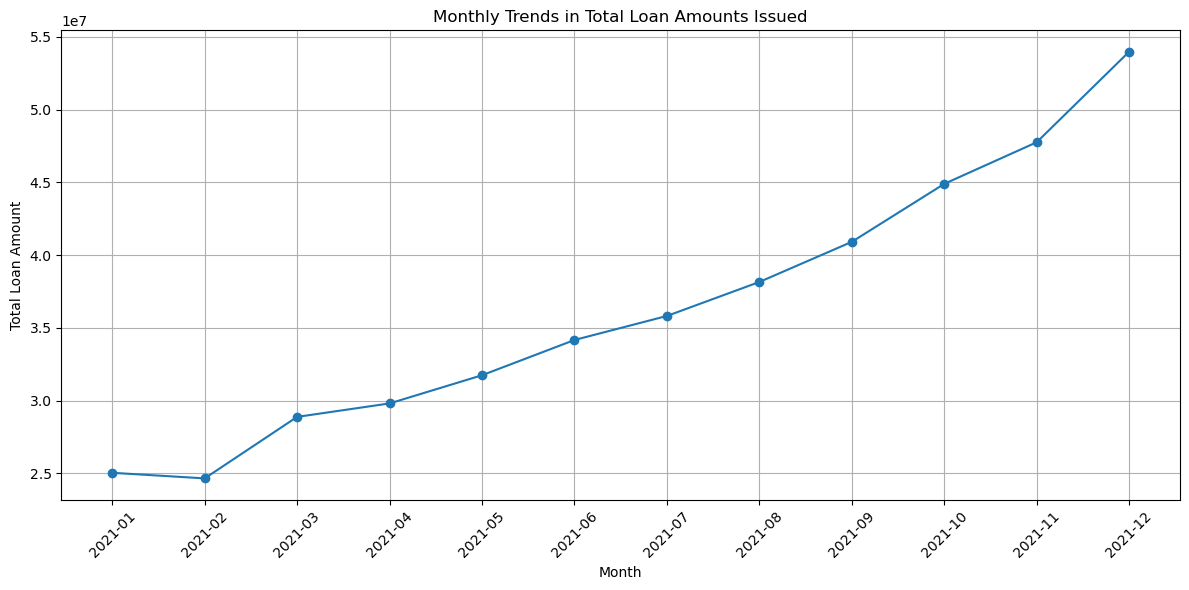

In [101]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
# Extract year and month for grouping
df['issue_year_month'] = df['issue_date'].dt.to_period('M')
# Group by 'issue_year_month' to calculate the total loan amounts for each month
monthly_trends = df.groupby('issue_year_month')['loan_amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['issue_year_month'].astype(str), monthly_trends['loan_amount'], marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.title('Monthly Trends in Total Loan Amounts Issued')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Monthly Trends in Total Loan Amounts Issued.png')
# Show the plot
plt.show()

**4. TOTAL LOAN ABOUT BY STATE**

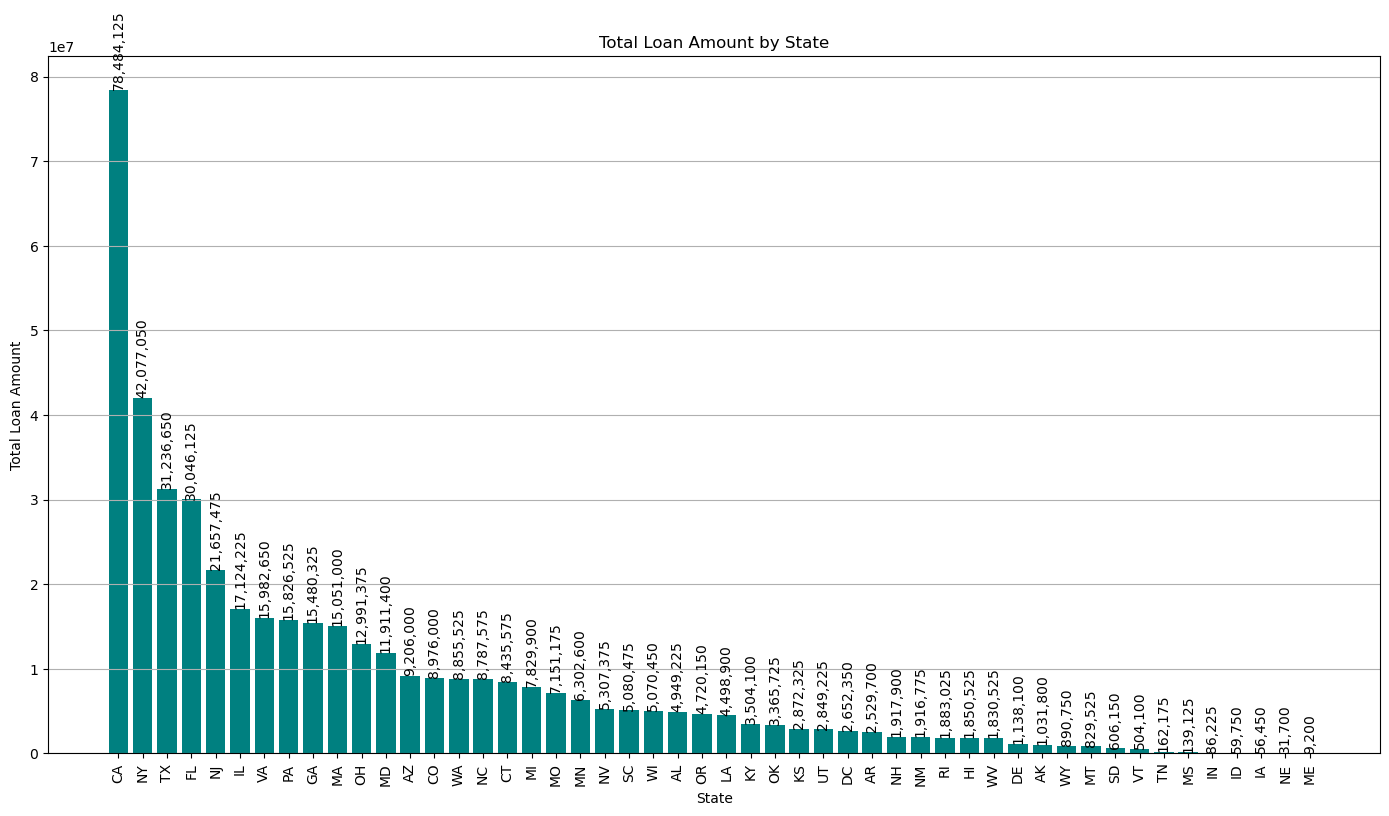

In [102]:
import matplotlib.pyplot as plt

# Aggregate the data by 'address_state' to calculate the total loan amounts for each state
state_trends = df.groupby('address_state')['loan_amount'].sum().reset_index()

# Sort the data for better visualization
state_trends = state_trends.sort_values(by='loan_amount', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(state_trends['address_state'], state_trends['loan_amount'], color='teal')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

# Annotate the values on top of the bars, rotated vertically
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=90)

# Save the plot
plt.savefig('Total Loan Amount by State.png')

# Show the plot
plt.show()


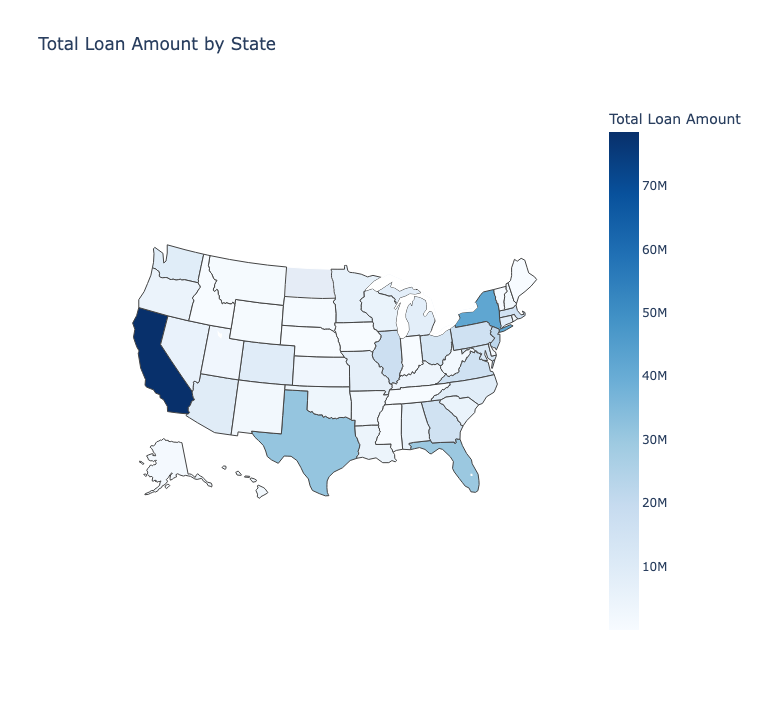

In [103]:
import plotly.express as px

# Create the figure
fig = px.choropleth(
    state_trends,
    locations='address_state',
    locationmode='USA-states',
    color='loan_amount',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'loan_amount': 'Total Loan Amount'},
    title='Total Loan Amount by State'
)

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))

fig.write_image("loan_amount_by_state.png")

fig.show()


**5. LOAN TERM ANALYSIS** 

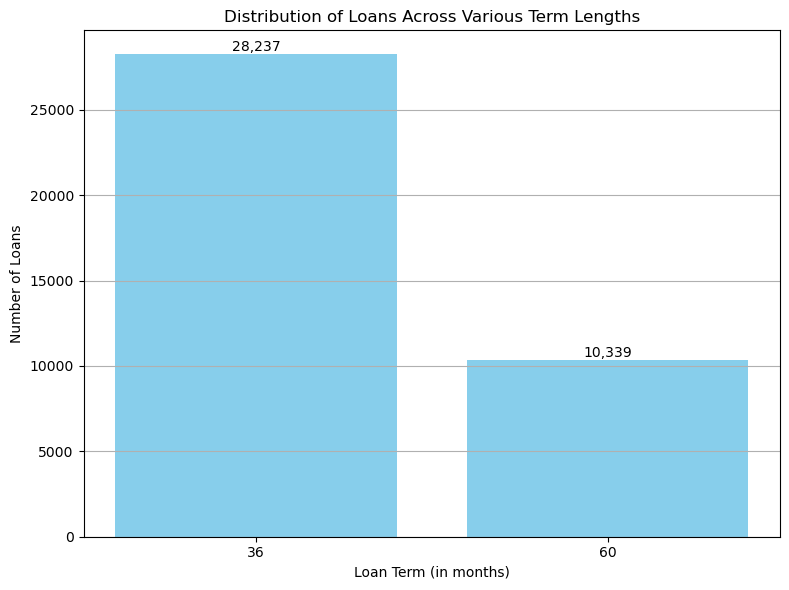

In [104]:
# Get the term distribution
term_distribution = df['term(in months)'].value_counts().reset_index()
term_distribution.columns = ['Term (in months)', 'Number of Loans']

# Sort the data for better visualization
term_distribution = term_distribution.sort_values(by='Term (in months)')

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(term_distribution['Term (in months)'].astype(str), term_distribution['Number of Loans'], color='skyblue')

# Add labels and title
plt.xlabel('Loan Term (in months)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans Across Various Term Lengths')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Annotate the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

# Save the plot
plt.savefig('Distribution of Loans Across Various Term Lengths.png')

# Show the plot
plt.show()

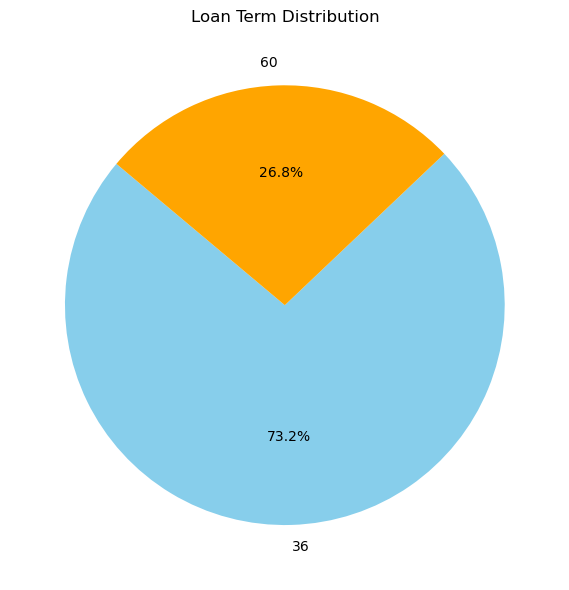

In [105]:
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(term_distribution['Number of Loans'], labels=term_distribution['Term (in months)'].astype(str), 
        autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=140)

# Add title
plt.title('Loan Term Distribution')
plt.tight_layout()
plt.savefig('Loan Term Distribution.png')
# Show the plot
plt.show()


**6. EMPLOYEE LENGTH ANALYSIS**

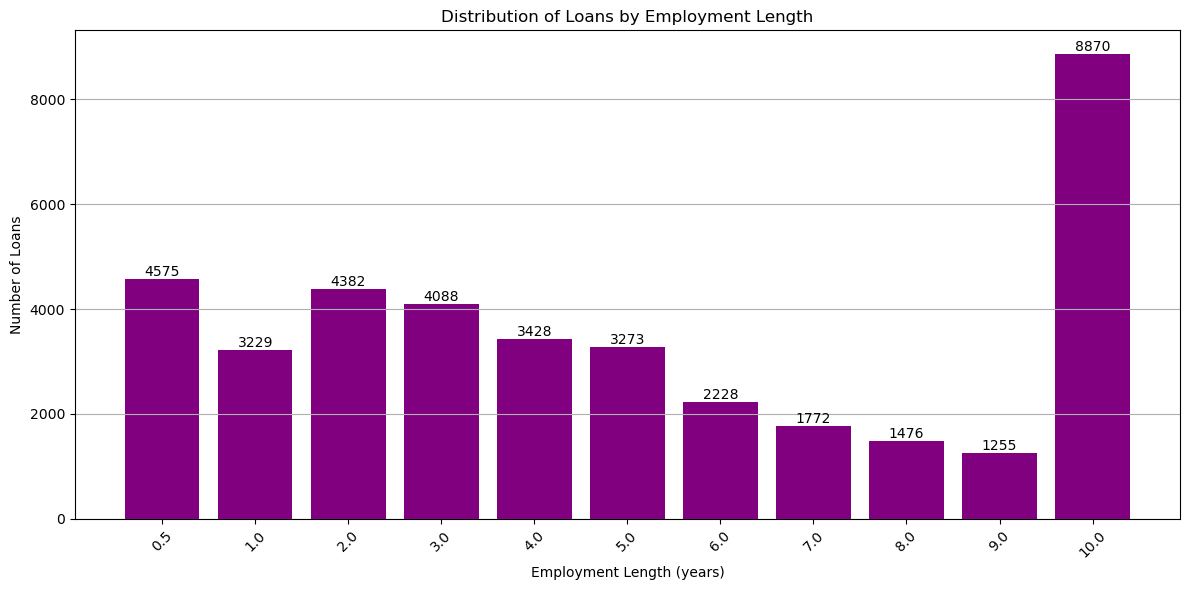

In [106]:
# Aggregate the data by 'emp_length' to count the number of loans for each employment length
emp_length_distribution = df['emp_length'].value_counts().reset_index()
emp_length_distribution.columns = ['Employment Length (years)', 'Number of Loans']

# Sort the data for better visualization
emp_length_distribution = emp_length_distribution.sort_values(by='Employment Length (years)')

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(emp_length_distribution['Employment Length (years)'].astype(str), 
               emp_length_distribution['Number of Loans'], color='purple')

# Add labels and title
plt.xlabel('Employment Length (years)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Employment Length')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig('Distribution of Loans by Employment Length.png')
plt.show()

**7. LOAN PURPOSE BREAKDOWN**

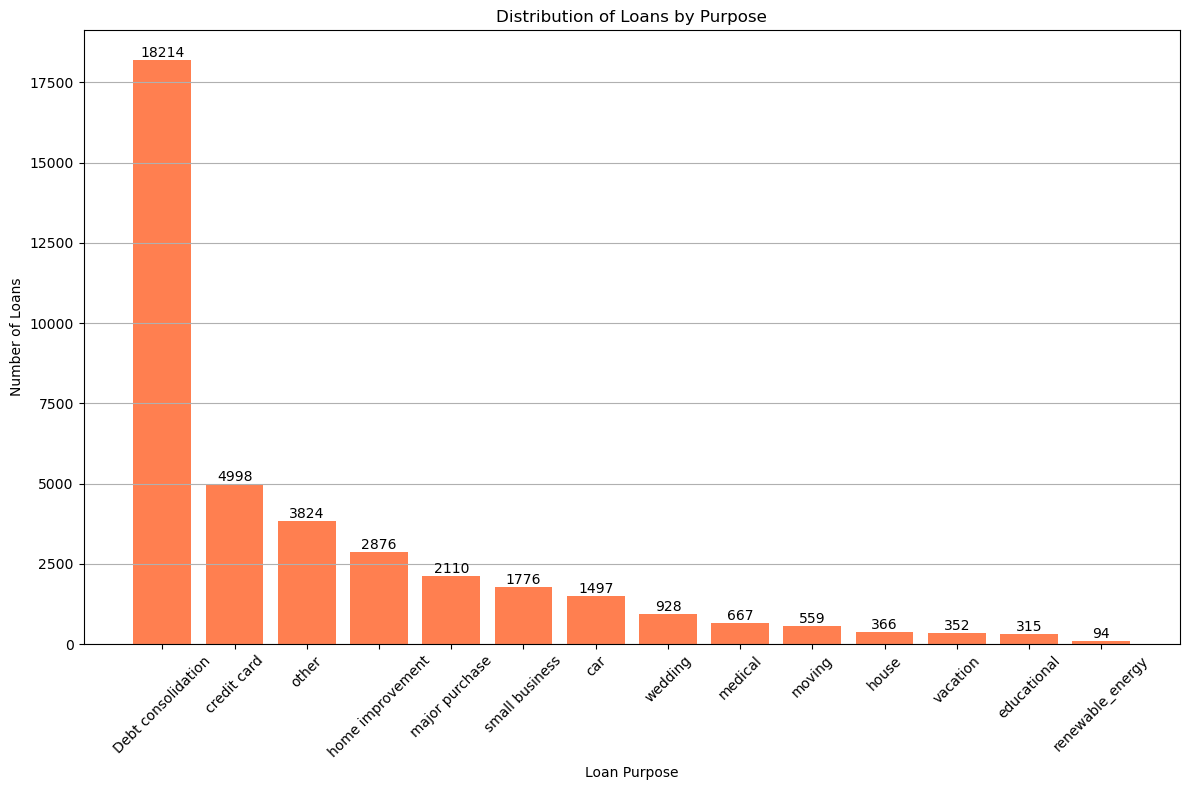

In [107]:
# Aggregate the data by 'purpose' to count the number of loans for each purpose
purpose_distribution = df['purpose'].value_counts().reset_index()
purpose_distribution.columns = ['Loan Purpose', 'Number of Loans']

# Sort the data for better visualization
purpose_distribution = purpose_distribution.sort_values(by='Number of Loans', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(purpose_distribution['Loan Purpose'], purpose_distribution['Number of Loans'], color='coral')

# Add labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Purpose')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig('Distribution of Loans by Purpose.png')
plt.show()

**8. HOME OWNERSHIP ANALYSIS**

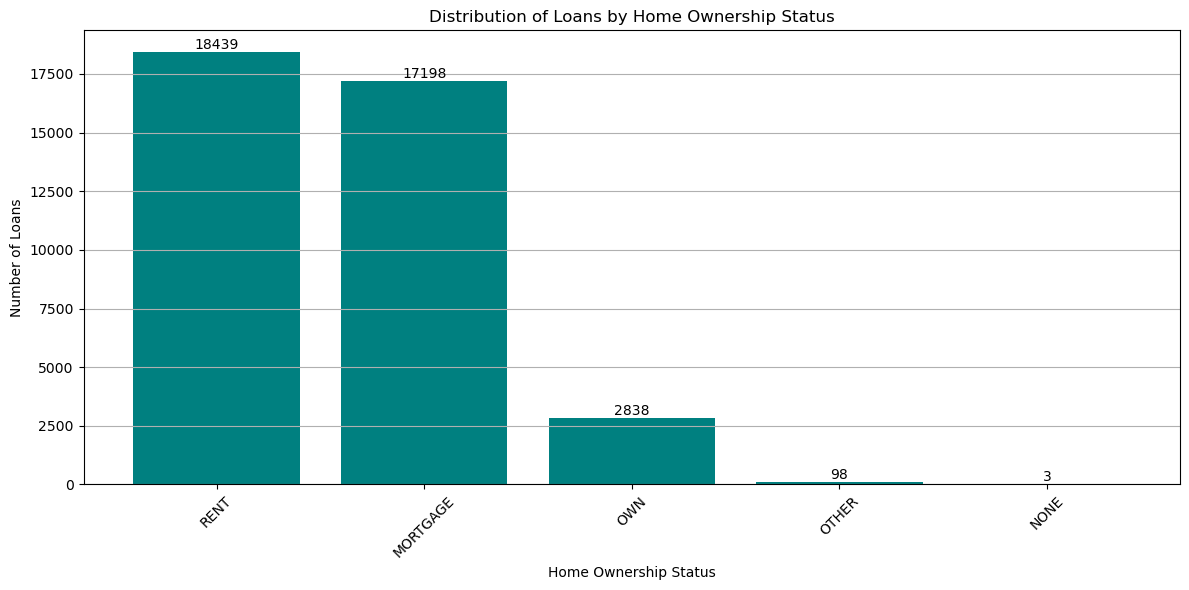

In [108]:
# Aggregate the data by 'home_ownership' to count the number of loans for each home ownership status
home_ownership_distribution = df['home_ownership'].value_counts().reset_index()
home_ownership_distribution.columns = ['Home Ownership Status', 'Number of Loans']

# Sort the data for better visualization
home_ownership_distribution = home_ownership_distribution.sort_values(by='Number of Loans', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(home_ownership_distribution['Home Ownership Status'], home_ownership_distribution['Number of Loans'], color='teal')

# Add labels and title
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Home Ownership Status')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.savefig('Distribution of Loans by Home Ownership Status.png')
plt.show()